In [1]:
# default_exp mnist

# Image classification with MNIST
> This page contains various exercises of image classification task with famous MNIST dataset.

In [2]:
from fastai.vision import *

## Data preparation

In [3]:
mnist = untar_data(URLs.MNIST_SAMPLE)

In [4]:
!tree -d $mnist

/home/condor/.fastai/data/mnist_sample
├── models
├── test
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

8 directories


Use data augmentation, but not flipping:

In [5]:
get_transforms?

In [6]:
tfms = get_transforms(do_flip=False)

In [17]:
data = (ImageList.from_folder(mnist) #,convert_mode='L')
        .split_by_rand_pct(0.2)
        .label_from_folder()
       # .add_test_folder(mnist/'testing')
        .transform(tfms)
        .databunch(bs=128)
       .normalize(imagenet_stats))

In [18]:
data

ImageDataBunch;

Train: LabelList (11552 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/condor/.fastai/data/mnist_sample;

Valid: LabelList (2888 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,7,7,7,3
Path: /home/condor/.fastai/data/mnist_sample;

Test: None

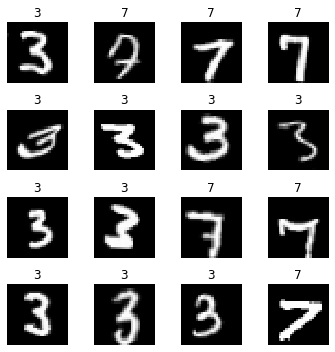

In [19]:
data.show_batch(4,figsize=(5,5))

## Model 1

In [20]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy])

In [21]:
learner

Learner(data=ImageDataBunch;

Train: LabelList (11552 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/condor/.fastai/data/mnist_sample;

Valid: LabelList (2888 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,7,7,7,3
Path: /home/condor/.fastai/data/mnist_sample;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [22]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


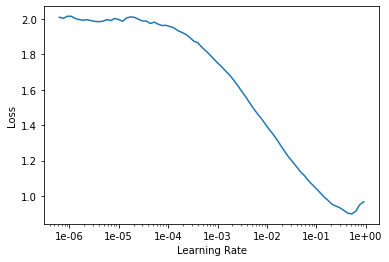

In [23]:
learner.recorder.plot()